# SNPs: Sensitivity analysis

In [60]:
from SALib.sample import saltelli, fast_sampler
from SALib.sample import ff as ffs
from SALib.analyze import sobol, fast, ff
from SALib.plotting.bar import plot as barplot
import numpy as np
import pandas as pd
import shutil
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

model_path = "../models/BMI-SNP/"
output_path = "../output/data/"
plots_path = "../output/plots/"

In [61]:
# parameter dictionary
problem = {
    'num_vars': 3,
    'names': ['random-mating', 'genetic-variance', 'fertility-differential'],
    'bounds': [[0, 1.0],
               [0, 0.50],
               [0, 0.30]]
}

# EFast

In [62]:
sample_parameters = False
if (sample_parameters):
    param_values = fast_sampler.sample(problem, 2000)
    t = pd.DataFrame(param_values)
    t.columns = ['random-mating', 'genetic-variance', 'fertility-differential']
    t.to_csv(model_path + "data/param-snp-efast.csv", index=False)
else:
    t = pd.read_csv(model_path + "data/param-snp-efast.csv")
t.shape

(6000, 3)

# Proportion obese

In [63]:
# process results
df = pd.read_csv(output_path + "results-snp-efast.csv", sep = ";")
cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)
colnames = ['g'+str(i+1) for i in range(4)]
cols.columns = colnames
cols = cols[colnames].apply(pd.to_numeric)
df = pd.concat([df, cols], axis=1, ignore_index=False)
params = pd.read_csv(output_path + "param-snp-efast.csv", sep = ";")
df = df.merge(params, on = ["iteration", "replicate"])
df["iteration"] = pd.to_numeric(df["iteration"])
df = df.sort_values(by=['iteration'])
df = df.loc[df["iteration"] <= len(t),:]


<ipython-input-63-c95e5708c961>:3: FutureWarning:

The default value of regex will change from True to False in a future version.



In [64]:
Y = df["g4"].to_numpy()
len(Y)
Sif = fast.analyze(problem, Y, print_to_console=True)

                              S1        ST   S1_conf   ST_conf
random-mating           0.136439  0.298433  0.004309  0.019698
genetic-variance        0.416051  0.646275  0.003856  0.020353
fertility-differential  0.180927  0.335879  0.003847  0.019354


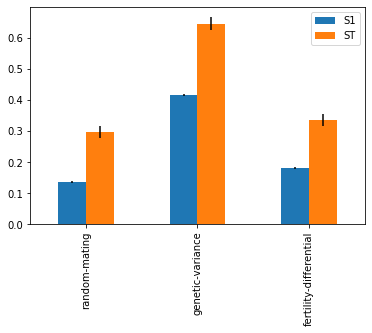

In [65]:
Sif.plot()
plt.savefig(plots_path + "snp-efast-prop-obese.pdf", bbox_inches='tight')

In [66]:
shutil.copy(plots_path + "snp-efast-prop-obese.pdf", "../manuscript/plots/")

'../manuscript/plots/snp-efast-prop-obese.pdf'

In [67]:
fig = px.scatter_3d(df, x='random_mating', y='fertility_factor', z='genetic_variance',
              color='g4', color_continuous_scale = px.colors.sequential.OrRd)

fig.update_traces(marker=dict(size=4, opacity = 0.7),
                  selector=dict(mode='markers'))
fig.update_layout(scene = dict(
                    xaxis_title='random mating',
                    yaxis_title='fertility differential',
                    zaxis_title='genetic variance'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10), 
                    coloraxis_colorbar=dict(title="Obese")
                    )
fig.show()

In [68]:
fig.write_image(plots_path + "3D-scatter-snps-efast.pdf")
shutil.copy(plots_path + "3D-scatter-snps-efast.pdf", "../manuscript/plots/")

'../manuscript/plots/3D-scatter-snps-efast.pdf'

# BMI

In [69]:
Y = df["average_bmi"].to_numpy()
len(Y)
Sif = fast.analyze(problem, Y, print_to_console=True)


                              S1        ST   S1_conf   ST_conf
random-mating           0.116793  0.233442  0.004008  0.017727
genetic-variance        0.442034  0.622581  0.004334  0.017385
fertility-differential  0.227158  0.360817  0.003742  0.018678


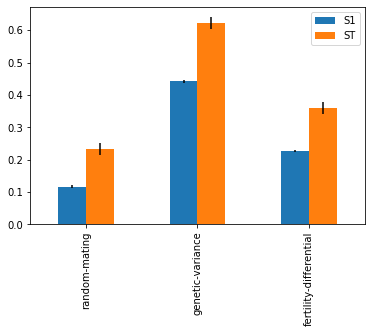

In [70]:
Sif.plot()
plt.savefig(plots_path + "snp-efast-average-bmi.pdf", bbox_inches='tight')

In [71]:
fig = px.scatter_3d(df, x='random_mating', y='fertility_factor', z='genetic_variance',
              color='average_bmi', color_continuous_scale = px.colors.sequential.OrRd)

fig.update_traces(marker=dict(size=4, opacity = 0.7),
                  selector=dict(mode='markers'))
fig.update_layout(scene = dict(
                    xaxis_title='random mating',
                    yaxis_title='fertility differential',
                    zaxis_title='genetic variance'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10), 
                    coloraxis_colorbar=dict(title="Average BMI")
                    )
fig.show()

# BMI variability

In [72]:
Y = df["sd_bmi"].to_numpy()
len(Y)
Sif = fast.analyze(problem, Y, print_to_console=True)

                              S1        ST   S1_conf   ST_conf
random-mating           0.182901  0.567868  0.003205  0.018049
genetic-variance        0.310079  0.706911  0.003904  0.017245
fertility-differential  0.050041  0.330228  0.003906  0.018021


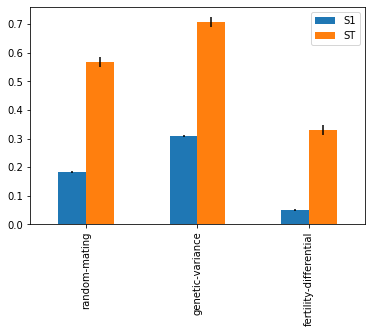

In [73]:
Sif.plot()
plt.savefig(plots_path + "snp-efast-sd-bmi.pdf", bbox_inches='tight')

In [74]:
fig = px.scatter_3d(df, x='random_mating', y='fertility_factor', z='genetic_variance',
              color='sd_bmi', color_continuous_scale = px.colors.sequential.OrRd)

fig.update_traces(marker=dict(size=4, opacity = 0.7),
                  selector=dict(mode='markers'))
fig.update_layout(scene = dict(
                    xaxis_title='random mating',
                    yaxis_title='fertility differential',
                    zaxis_title='genetic variance'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10), 
                    coloraxis_colorbar=dict(title="SD BMI")
                    )
fig.show()

# Sobol

In [75]:
sample_parameters = False
if (sample_parameters):
    param_values = saltelli.sample(problem, 2**11)
    t = pd.DataFrame(param_values)
    t.columns = ['random-mating', 'genetic-variance', 'fertility-differential']
    t.to_csv(model_path + "data/param-snp-sobol.csv", index=False)
else:
    t = pd.read_csv(model_path + "data/param-snp-sobol.csv")
len(t)

16384

In [76]:
# process results
df = pd.read_csv(output_path + "results-snp-sobol.csv", sep = ";")
cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)
colnames = ['g'+str(i+1) for i in range(4)]
cols.columns = colnames
cols = cols[colnames].apply(pd.to_numeric)
df = pd.concat([df, cols], axis=1, ignore_index=False)
params = pd.read_csv(output_path + "param-snp-sobol.csv", sep = ";")
df = df.merge(params, on = ["iteration", "replicate"])
df["iteration"] = pd.to_numeric(df["iteration"])
df = df.sort_values(by=['iteration'])
df = df.loc[df["iteration"] <= len(t),:]


<ipython-input-76-10a1ba598028>:3: FutureWarning:

The default value of regex will change from True to False in a future version.



## Proportion obese

In [77]:
Y = df["g4"].to_numpy()
len(Y)
Si = sobol.analyze(problem, Y, print_to_console=True)
total, first, second = Si.to_df()

                              ST   ST_conf
random-mating           0.304700  0.032893
genetic-variance        0.657539  0.059032
fertility-differential  0.341643  0.042578
                              S1   S1_conf
random-mating           0.144428  0.037220
genetic-variance        0.428707  0.051170
fertility-differential  0.188458  0.036814
                                                  S2   S2_conf
(random-mating, genetic-variance)           0.105429  0.082693
(random-mating, fertility-differential)     0.027101  0.065259
(genetic-variance, fertility-differential)  0.088145  0.086244


'../manuscript/plots/snp-sobol-s2-prop-obese.pdf'

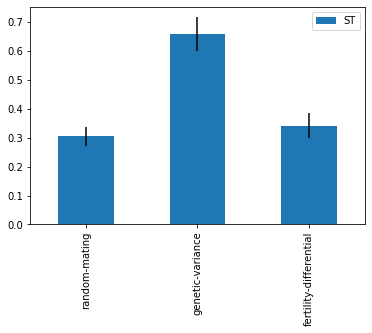

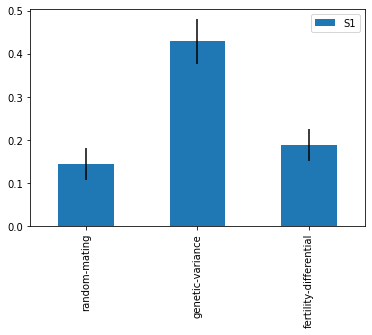

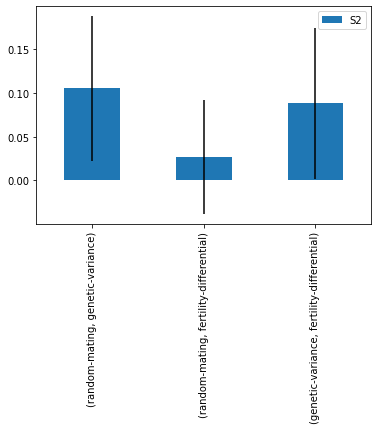

In [78]:
st = barplot(total)
plt.savefig(plots_path + "snp-sobol-st-prop-obese.pdf", bbox_inches='tight')
s1 = barplot(first)
plt.savefig(plots_path + "snp-sobol-s1-prop-obese.pdf", bbox_inches='tight')
s2 = barplot(second)
plt.savefig(plots_path + "snp-sobol-s2-prop-obese.pdf", bbox_inches='tight')

shutil.copy(plots_path + "snp-sobol-st-prop-obese.pdf", "../manuscript/plots/")
shutil.copy(plots_path + "snp-sobol-s1-prop-obese.pdf", "../manuscript/plots/")
shutil.copy(plots_path + "snp-sobol-s2-prop-obese.pdf", "../manuscript/plots/")

In [79]:
fig = px.scatter_3d(df, x='random_mating', y='fertility_factor', z='genetic_variance',
              color='g4', color_continuous_scale = px.colors.sequential.OrRd)

fig.update_traces(marker=dict(size=4, opacity = 0.7),
                  selector=dict(mode='markers'))
fig.update_layout(scene = dict(
                    xaxis_title='random mating',
                    yaxis_title='fertility differential',
                    zaxis_title='genetic variance'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10), 
                    coloraxis_colorbar=dict(title="Obese")
                    )
fig.show()

In [80]:
fig.write_image(plots_path + "3D-scatter-sobol-obese.pdf")
shutil.copy(plots_path + "3D-scatter-sobol-obese.pdf", "../manuscript/plots/")

'../manuscript/plots/3D-scatter-sobol-obese.pdf'

## BMI

In [81]:
Y = df["average_bmi"].to_numpy()
len(Y)
Si = sobol.analyze(problem, Y, print_to_console=True)
total, first, second = Si.to_df()

                              ST   ST_conf
random-mating           0.237658  0.025063
genetic-variance        0.634381  0.056463
fertility-differential  0.369272  0.037654
                              S1   S1_conf
random-mating           0.126786  0.030805
genetic-variance        0.457837  0.045215
fertility-differential  0.237061  0.033052
                                                  S2   S2_conf
(random-mating, genetic-variance)           0.069206  0.063907
(random-mating, fertility-differential)     0.020889  0.057823
(genetic-variance, fertility-differential)  0.077417  0.068272


'../manuscript/plots/snp-sobol-s2-average-bmi.pdf'

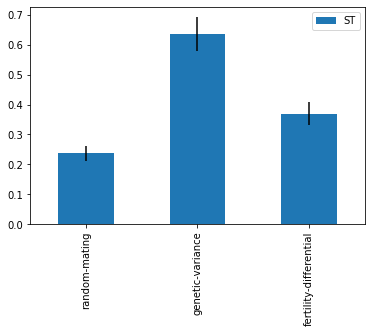

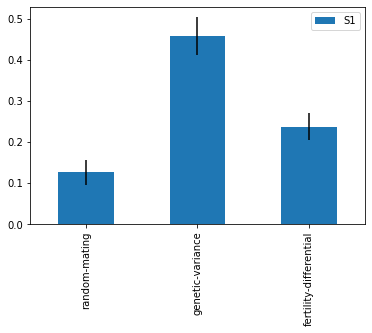

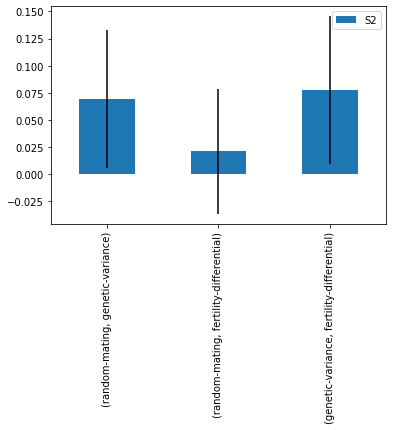

In [82]:
st = barplot(total)
plt.savefig(plots_path + "snp-sobol-st-average-bmi.pdf", bbox_inches='tight')
s1 = barplot(first)
plt.savefig(plots_path + "snp-sobol-s1-average-bmi.pdf", bbox_inches='tight')
s2 = barplot(second)
plt.savefig(plots_path + "snp-sobol-s2-average-bmi.pdf", bbox_inches='tight')

shutil.copy(plots_path + "snp-sobol-st-average-bmi.pdf", "../manuscript/plots/")
shutil.copy(plots_path + "snp-sobol-s1-average-bmi.pdf", "../manuscript/plots/")
shutil.copy(plots_path + "snp-sobol-s2-average-bmi.pdf", "../manuscript/plots/")

In [83]:
fig = px.scatter_3d(df, x='random_mating', y='fertility_factor', z='genetic_variance',
              color='average_bmi', color_continuous_scale = px.colors.sequential.OrRd)

fig.update_traces(marker=dict(size=4, opacity = 0.7),
                  selector=dict(mode='markers'))
fig.update_layout(scene = dict(
                    xaxis_title='random mating',
                    yaxis_title='fertility differential',
                    zaxis_title='genetic variance'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10), 
                    coloraxis_colorbar=dict(title="Average BMI")
                    )
fig.show()

## BMI variability

In [84]:
Y = df["sd_bmi"].to_numpy()
len(Y)
Si = sobol.analyze(problem, Y, print_to_console=True)
total, first, second = Si.to_df()

                              ST   ST_conf
random-mating           0.586884  0.078972
genetic-variance        0.712250  0.072149
fertility-differential  0.391129  0.061563
                              S1   S1_conf
random-mating           0.196759  0.057303
genetic-variance        0.309512  0.065272
fertility-differential  0.050327  0.035894
                                                  S2   S2_conf
(random-mating, genetic-variance)           0.190580  0.132601
(random-mating, fertility-differential)     0.081399  0.119553
(genetic-variance, fertility-differential)  0.122397  0.114592


'../manuscript/plots/snp-sobol-s2-sd-bmi.pdf'

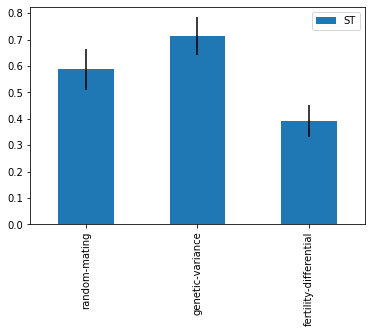

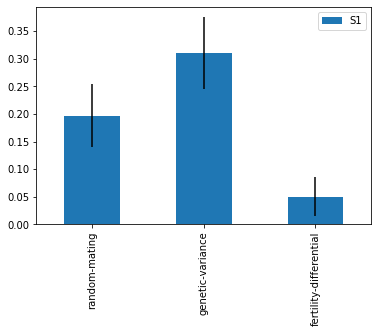

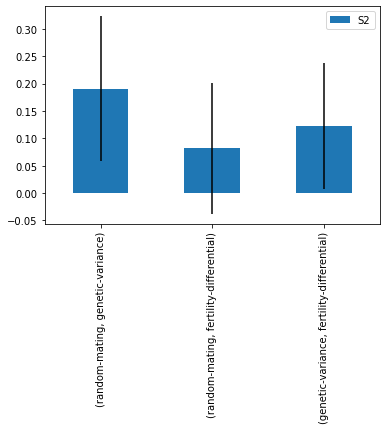

In [85]:
st = barplot(total)
plt.savefig(plots_path + "snp-sobol-st-sd-bmi.pdf", bbox_inches='tight')
s1 = barplot(first)
plt.savefig(plots_path + "snp-sobol-s1-sd-bmi.pdf", bbox_inches='tight')
s2 = barplot(second)
plt.savefig(plots_path + "snp-sobol-s2-sd-bmi.pdf", bbox_inches='tight')

shutil.copy(plots_path + "snp-sobol-st-sd-bmi.pdf", "../manuscript/plots/")
shutil.copy(plots_path + "snp-sobol-s1-sd-bmi.pdf", "../manuscript/plots/")
shutil.copy(plots_path + "snp-sobol-s2-sd-bmi.pdf", "../manuscript/plots/")

In [86]:
fig = px.scatter_3d(df, x='random_mating', y='fertility_factor', z='genetic_variance',
              color='sd_bmi', color_continuous_scale = px.colors.sequential.OrRd)

fig.update_traces(marker=dict(size=4, opacity = 0.7),
                  selector=dict(mode='markers'))
fig.update_layout(scene = dict(
                    xaxis_title='random mating',
                    yaxis_title='fertility differential',
                    zaxis_title='genetic variance'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10), 
                    coloraxis_colorbar=dict(title="SD BMI")
                    )
fig.show()